In [1]:
import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

## Setup input data

In [2]:
input_data = 'diffr_100x100_50k/diffr_out_0000003.h5'

In [16]:
with h5py.File(input_data,'r') as fh:
    print (fh['data'])

<HDF5 group "/data" (1709 members)>


In [5]:
H5Glance(input_data)

## Convert one frame to check

### Original

100.66389768157929 28867.420768744774 0.00022114290767802163
101.54390631288729 28897.270108501878 3.414920285150726e-05


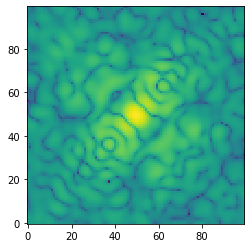

In [10]:
with h5py.File(input_data,'r') as fh:
    for i,frame in enumerate(fh['data']) :
        if (i > 1):
            break
        diffr = fh['data/'+frame+'/diffr'][0]
        plt.imshow(diffr,norm=colors.LogNorm(vmin=diffr.min(), vmax=diffr.max()),origin='lower')
        print (diffr.mean(),diffr.max(),diffr.min())

### Set multiplication

In [12]:
multiplication = 1

### After multiplication

100.1917 28867 0


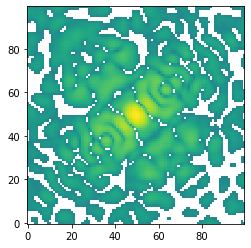

In [14]:
with h5py.File(input_data,'r') as fh:
    new_diffr = fh['data/0033333/diffr'][0]*multiplication
with h5py.File('tmp.h5','w') as f:
    f.create_dataset("diffr", data=new_diffr,dtype='i8')    
with h5py.File('tmp.h5','r') as fh:
    tmp_diffr = fh['diffr'][...]
    plt.imshow(tmp_diffr,norm=colors.LogNorm(vmin=tmp_diffr.min()+0.0001, vmax=tmp_diffr.max()),origin='lower')
    print (tmp_diffr.mean(),tmp_diffr.max(),tmp_diffr.min())